# <center> XML, JSON, and APIs </center>

Today we'll learn more about data structures, and collecting data from the web (data structures are different than data *types* in Python. In Part 1 today we'll learn about XML. In Part 2 we'll learn about JSON via the *New York Times* API.


# Part 1: Geographical Imagination

In Part 1 we'll learn about XML by examining the geographical imagination in the Women Writers Project data by graphing the most frequent place name in a sample of the literature, comparing literature produce in North America to literature produced in Britain. The results are not groundbreaking, but it does give us the chance to practice our Python skills, learn one way to visualize text in a simple way with the skills you know, and gets us thinking about how we might start to do geographical analyses using Python.

The research goal from Part 1 today: pull out all of the places mentioned in the literature produced in Britain and North America. Compare the most frequent place names across these two locations.

To do so, we need to pull out all of the place name tags in the xml files.

## New Skills 
* Parsing XML using the library BeautifulSoup
* Looping through multiple files using the library Glob
* Introduction to visualizations using the library Seaborn (just planting the seed!)
* Get requests
* Parsing JSON (really just elaborate dictionaries)

# 1. Parsing XML using BeautifulSoup

XML (Extensible Markup Lanugage), and HTML (Hypertext Markup Language) are two popularly used machine-readable representations of text and documents, but they serve two very different purposes:

* XML was developed to describe data and to focus on what the data represent.
* HTML was developed to display data about to focus on the way that data looks.
* HTML is about displaying data, XML is about describing information.
* XML is extensible.


Both of these formats are really easy to parse using Python. We could do it using built-in Python tools, but there are a few popular libraries that make it really easy to pull out information we want. We will use Python's BeautifulSoup to pull out fiels in XML files.

In [12]:
import glob #this helps us gather all of the files of interest in one or more folders. We'll use it more below
from bs4 import BeautifulSoup #library we will use to parse xml documents
import pandas
from matplotlib import pyplot as plt #plotting! We'll learn more about plotting in the next few weeks
import seaborn as sns

%matplotlib inline

In [13]:
#Read in our file, the way we have done before. Notice the file extension on this file.
myfile = open("../data/wwp/britain/aikin.epistles.xml", encoding = 'utf-8').read()

myfile[:1000]

'<?xml version="1.0" encoding="UTF-8"?>\n<?xml-model href="../schema/wwp-store.rng"    type="application/xml" schematypens="http://relaxng.org/ns/structure/1.0"?>\n<?xml-model href="../schema/wwp-store.isosch" type="application/xml" schematypens="http://purl.oclc.org/dsdl/schematron"?>\n<!-- $Id: aikin.epistles.xml 31962 2017-06-23 22:20:54Z syd $ -->\n<TEI xmlns="http://www.wwp.northeastern.edu/ns/textbase" xmlns:xi="http://www.w3.org/2001/XInclude" xml:lang="en">\n  <teiHeader xml:id="TR00002.hdr">\n    <fileDesc>\n      <titleStmt>\n        <title type="main">Epistles on Women, 1810</title>\n        <author>\n          <persName type="person-female" ref="p:laikin.mag">Aikin, Lucy</persName>\n        </author>\n        <sponsor>Brown University</sponsor>\n        <sponsor>Northeastern University</sponsor>\n        <funder>U.S. National Endowment for the Humanities</funder>\n      </titleStmt>\n      <xi:include href="../common-boilerplate.xml" xpointer="element(WWPedition)"/>    \n  

In [14]:
type(myfile)

str

This output is difficult for a human to parse, but everything is marked up in a way the computer can easily parse.

Tags are makred using the <> symbols. For example: < author > < /author >

We can access the different "tags" in the document using BeautifulSoup.

We first need to convert the string object into a BeautifulSoup object.

In [15]:
#Turn the file into a BeautifulSoup object that we are calling soup
soup = BeautifulSoup(myfile, "xml")

In [16]:
type(soup)

bs4.BeautifulSoup

Professor Flanders told me that the place names are indicated by the `placeName` tag, and these are nested within the `text` tag (there is also header and footer information that we want to ignore.

To find all the information within a certain tag, we can use the `find_all` function on our BeautifulSoup object.

In [17]:
soup.find_all("text")

[<text xml:id="TR00002">
 <hyperDiv>
 <notes>
 <note anchored="true" rend="pre(*)align(left)indent(4)place(foot)" target="#a033" xml:id="n033">
 <quote rend="pre(“)post(”)">Vitaï lampada tradunt.</quote>
 <bibl rend="align(right)right-indent(1)"><author><persName rend="case(smallcaps)">Lucretius</persName></author>.</bibl>
 </note>
 <note anchored="true" rend="place(foot)align(left)indent(4)pre(*)" target="#a035" xml:id="n035">
 <p>See <title rend="pre(“)post(”)"><said>The Snowdrop</said></title>.</p>
 </note>
 <note anchored="true" rend="place(foot)align(left)indent(4)pre(†)" target="#a036" xml:id="n036">
 <p>See <title rend="pre(“)post(”)">
 <said>The Battle of <placeName>Alexandria</placeName></said></title>.</p>
 </note>
 <note anchored="true" rend="place(foot)align(left)indent(2)pre(*)" target="#a037" xml:id="n037">
 <quote rend="pre()post()" xml:lang="la">Suave mari magno, 
 turbantibus æquora ventis,
 <lb/>E terra magnum alterius spectare laborem.</quote>
 <bibl rend="case(small

In [18]:
#We can loop through this one at a time
for item in soup.find_all("text"):
    print(item)

<text xml:id="TR00002">
<hyperDiv>
<notes>
<note anchored="true" rend="pre(*)align(left)indent(4)place(foot)" target="#a033" xml:id="n033">
<quote rend="pre(“)post(”)">Vitaï lampada tradunt.</quote>
<bibl rend="align(right)right-indent(1)"><author><persName rend="case(smallcaps)">Lucretius</persName></author>.</bibl>
</note>
<note anchored="true" rend="place(foot)align(left)indent(4)pre(*)" target="#a035" xml:id="n035">
<p>See <title rend="pre(“)post(”)"><said>The Snowdrop</said></title>.</p>
</note>
<note anchored="true" rend="place(foot)align(left)indent(4)pre(†)" target="#a036" xml:id="n036">
<p>See <title rend="pre(“)post(”)">
<said>The Battle of <placeName>Alexandria</placeName></said></title>.</p>
</note>
<note anchored="true" rend="place(foot)align(left)indent(2)pre(*)" target="#a037" xml:id="n037">
<quote rend="pre()post()" xml:lang="la">Suave mari magno, 
turbantibus æquora ventis,
<lb/>E terra magnum alterius spectare laborem.</quote>
<bibl rend="case(smallcaps)break(yes)alig

In [19]:
#Within this section of the document, we want to pull out the place names.
#We can practice first with person names, under the tag 'persName'
for item in soup.find_all("text"):
    for person in item.find_all("placeName"):
        print(person)

<placeName>Alexandria</placeName>
<placeName>Ludlow Castle</placeName>
<placeName>Bridgewater</placeName>
<placeName>St. Paul's Churchyard</placeName>
<placeName>Shoe Lane</placeName>
<placeName>London</placeName>
<placeName>Germany</placeName>
<placeName>Europe</placeName>
<placeName>Cambria</placeName>
<placeName>Liverpool</placeName>
<placeName>Blenheim Castle</placeName>
<placeName>Ludlow Castle</placeName>
<placeName>Eden</placeName>
<placeName>New Holland</placeName>
<placeName>Otaheite</placeName>
<placeName>Guinea</placeName>
<placeName>Arcadia</placeName>
<placeName>Southern Main</placeName>
<placeName>Otaheite</placeName>
<placeName>Greenland</placeName>
<placeName>Europe's</placeName>
<placeName>Afric's</placeName>
<placeName>Chaldea's</placeName>
<placeName>Troy</placeName>
<placeName>Athens</placeName>
<placeName>Rome</placeName>
<placeName>Rome</placeName>
<placeName>Rome</placeName>
<placeName>Siena</placeName>
<placeName>Troy</placeName>
<placeName>Sparta</placeName>
<p

In [22]:
#Let's remove all the xml markup so we can read this better
#We'll use a nested loop to do this
for item in soup.find_all("text"):
    for place in item.find_all("placeName"):
        print(place.text)

Alexandria
Ludlow Castle
Bridgewater
St. Paul's Churchyard
Shoe Lane
London
Germany
Europe
Cambria
Liverpool
Blenheim Castle
Ludlow Castle
Eden
New Holland
Otaheite
Guinea
Arcadia
Southern Main
Otaheite
Greenland
Europe's
Afric's
Chaldea's
Troy
Athens
Rome
Rome
Rome
Siena
Troy
Sparta
Columbia's
Athens
Athens
Tiber
Rome
Rome
Rome's
Latium's
Rome
Rome's
Rome
Rome
Juda's
Eden
Rome
Switzerland
France
France
England
Ganges'
France
Rome
Araxes
Spanner
Rome
Elbe
Weser
Switzerland
Gaul's
France
England's
Egypt
France
York
Lancaster
England's
Rome
France
Belgia
Essex
Britannia
Albion
New Holland
New Holland
America
America
America
Otaheite
Old Castile
Assisi
Assisi
Sienna
Avignon
Rome
Avignon
France
Spain
Gaul
England
Morat
Burgundy
Sempach
France
Mona
Mercia
Mercia
Britain
Cambria
Cambria
Plinlimmon
Snowdon
Cambria's
Denbigh's
Clwyd's
Caernarvon's
Harlech
Conway's
Liverpool
Helvetia's
Alps
Gaul
Latium's
Morat's
Atlantic
Columbia
Siberia
Marlborough
Teme's
Cambria's
Shoe Lane, London
Eden
New H

In [23]:
#Great! Let's turn this into a list object so we can do further things with it

#initialize an empty list
place_list = []
for item in soup.find_all("text"):
    for place in item.find_all("placeName"):
        place_list.append(place.text)
place_list

['Alexandria',
 'Ludlow Castle',
 'Bridgewater',
 "St. Paul's Churchyard",
 'Shoe Lane',
 'London',
 'Germany',
 'Europe',
 'Cambria',
 'Liverpool',
 'Blenheim Castle',
 'Ludlow Castle',
 'Eden',
 'New Holland',
 'Otaheite',
 'Guinea',
 'Arcadia',
 'Southern Main',
 'Otaheite',
 'Greenland',
 "Europe's",
 "Afric's",
 "Chaldea's",
 'Troy',
 'Athens',
 'Rome',
 'Rome',
 'Rome',
 'Siena',
 'Troy',
 'Sparta',
 "Columbia's",
 'Athens',
 'Athens',
 'Tiber',
 'Rome',
 'Rome',
 "Rome's",
 "Latium's",
 'Rome',
 "Rome's",
 'Rome',
 'Rome',
 "Juda's",
 'Eden',
 'Rome',
 'Switzerland',
 'France',
 'France',
 'England',
 "Ganges'",
 'France',
 'Rome',
 'Araxes',
 'Spanner',
 'Rome',
 'Elbe',
 'Weser',
 'Switzerland',
 "Gaul's",
 'France',
 "England's",
 'Egypt',
 'France',
 'York',
 'Lancaster',
 "England's",
 'Rome',
 'France',
 'Belgia',
 'Essex',
 'Britannia',
 'Albion',
 'New Holland',
 'New Holland',
 'America',
 'America',
 'America',
 'Otaheite',
 'Old Castile',
 'Assisi',
 'Assisi',
 'Sienn

### Exercise 1.1: Using the code you wrote in the programming exercise, or from last week's in-class tutorial, count the most common place names in the text. 

### Note: notice the punctuation in the elements in the above list. Think through if you want to remove them or not.

### Note 2: I highly recommend writing this code in the form of a function. This will come in handy below.

In [ ]:
#Exercise 1.1 code here
punct_list = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', ' ', '\n']

place_clean =[]
for name in place_list:
        name_clean = name.replace("'s", "")
        place_clean.append(name_clean)
#Counting Words
counts = dict()
for place in place_clean:
    if place not in counts:
        counts[place] = 1
    else:
        counts[place] += 1
counts

In [ ]:
#Frequency of Words
counts.items()

freq_words = []
for key, val in counts.items():
    freq_words.append((val, key))

freq_words.sort(reverse=True)
freq_words

In [24]:
def freq_words(text_list):
    punct_list = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', ' ', '\n']
    counts= dict()
    for word in text_list:
        word = "".join([str(ch) for ch in word if str(ch) not in punct_list])
        if word not in counts:
            counts[word] = 1
        else: 
            counts[word] += 1
            
    freq_words = []
    for key, val in counts.items():
        freq_words.append((val,key))
    #print(freq_words)
    freq_words.sort(reverse = True)
    return(freq_words)

freq_place_aiken = freq_words(place_list)
freq_place_aiken

[(26, 'Rome'),
 (16, 'France'),
 (6, 'Otaheite'),
 (6, 'NewHolland'),
 (6, 'Athens'),
 (6, 'America'),
 (5, 'Cambria'),
 (4, 'Troy'),
 (4, 'Switzerland'),
 (4, 'Romes'),
 (4, 'Mercia'),
 (4, 'Latiums'),
 (4, 'Gaul'),
 (4, 'Englands'),
 (4, 'England'),
 (4, 'Eden'),
 (4, 'Cambrias'),
 (4, 'Avignon'),
 (4, 'Assisi'),
 (3, 'Liverpool'),
 (2, 'York'),
 (2, 'Weser'),
 (2, 'Tiber'),
 (2, 'Temes'),
 (2, 'Sparta'),
 (2, 'Spanner'),
 (2, 'Spain'),
 (2, 'SouthernMain'),
 (2, 'Snowdon'),
 (2, 'Sienna'),
 (2, 'Siena'),
 (2, 'Siberia'),
 (2, 'ShoeLaneLondon'),
 (2, 'Sempach'),
 (2, 'Plinlimmon'),
 (2, 'OldCastile'),
 (2, 'Morats'),
 (2, 'Morat'),
 (2, 'Mona'),
 (2, 'Marlborough'),
 (2, 'LudlowCastle'),
 (2, 'Lancaster'),
 (2, 'Judas'),
 (2, 'Helvetias'),
 (2, 'Harlech'),
 (2, 'Guinea'),
 (2, 'Greenland'),
 (2, 'Gauls'),
 (2, 'Ganges'),
 (2, 'Europes'),
 (2, 'Essex'),
 (2, 'Elbe'),
 (2, 'Egypt'),
 (2, 'Denbighs'),
 (2, 'Conways'),
 (2, 'Columbias'),
 (2, 'Columbia'),
 (2, 'Clwyds'),
 (2, 'Chaldeas')

## Exercise 1.2: Write a function called 'extract_entities' that takes three inputs:
1. A Womens Writers Project xml filename
2. A higher nested tag (for example, text)
3. A lower nested tag (for example, placeName)

The function should return a list of tuples with the count followed by the element name, sorted in descending order. For example, with 'text' and 'placeName' as the xml tag inputs, and a filename as the filename input, the function should return a list of the number of times each place name occurs, listed in descending order.

In [25]:
#Exericse 2.2 code here

def extract_entities(file, text, placeName):
    from bs4 import BeautifulSoup #library we will use to parse xml documents
    myfile = open(file, encoding = 'utf-8').read()
    #Convert to Soup File to read XML Tags
    soup = BeautifulSoup(myfile, "xml")
    
    place_list = []
    for item in soup.find_all(text):
        for place in item.find_all(placeName):
            place_list.append(place.text)
            
    #Counting Words
    counts = dict()
    for place in place_list:
        if place not in counts:
            counts[place] = 1
        else:
            counts[place] += 1

    #Frequency of Words
    counts.items()

    freq_words = []
    for key, val in counts.items():
        freq_words.append((val, key))

    freq_words.sort(reverse=True)
    freq_words


In [27]:
def extract_entities(myfile, xml_tag1, xml_tag2):
    entity_list =[]
    file = open(myfile, encoding = 'UTF-8').read()
    soup = BeautifulSoup(file, 'xml')
    for item in soup.find_all(xml_tag1):
        for e in item.find_all(xml_tag2):
            entity_list.append(e.text)
    freq_place_names = freq_words(entity_list)
    return freq_place_names

In [28]:
#Run this cell to test your code
#If it is correct, it will output a list of names
freq_words_bannerman = extract_entities("../data/wwp/britain/bannerman.poems.xml", 'text', 'placeName')
freq_words_bannerman

[(5, 'Lima'),
 (4, 'Edinburgh'),
 (3, 'Atlantic'),
 (2, 'Paris'),
 (2, 'London'),
 (2, 'Icelands'),
 (2, 'Europe'),
 (2, 'Africs'),
 (1, 'laFayette'),
 (1, 'Zemblas'),
 (1, 'Zaaras'),
 (1, 'WeſtIndies'),
 (1, 'WeſtIndiaIſlands'),
 (1, 'Var'),
 (1, 'Tunis'),
 (1, 'TerraFirma'),
 (1, 'StKilda'),
 (1, 'Spains'),
 (1, 'Siberias'),
 (1, 'Saturn'),
 (1, 'Sandford'),
 (1, 'RoyalBankCloſe'),
 (1, 'RoyalBankClose'),
 (1, 'Rhine'),
 (1, 'Provence'),
 (1, 'Potoſis'),
 (1, 'Potoſi'),
 (1, 'Panamas'),
 (1, 'PacificOcean'),
 (1, 'Pacific'),
 (1, 'Orellana'),
 (1, 'Olmutz'),
 (1, 'Nile'),
 (1, 'Moſkoes'),
 (1, 'MountHecla'),
 (1, 'Merton'),
 (1, 'Magadoxas'),
 (1, 'Maelſtrom'),
 (1, 'Italy'),
 (1, 'Heclas'),
 (1, 'Hecla'),
 (1, 'Hebrid'),
 (1, 'Gambia'),
 (1, 'France'),
 (1, 'Europes'),
 (1, 'Edens'),
 (1, 'Eden'),
 (1, 'CapeVerde'),
 (1, 'Callaos'),
 (1, 'Callao'),
 (1, 'BayofPanama'),
 (1, 'Arctic'),
 (1, 'Antarctic'),
 (1, 'Andes')]

# 2. Loop through multiple files using `glob`

Glob allows us to list all files in a directory the meet a certain criteria. For our purposes, we will list all files in the directory that have the .xml file extension.

In [29]:
glob.glob('../data/wwp/britain/*.xml')

['../data/wwp/britain/aikin.epistles.xml',
 '../data/wwp/britain/bannerman.poems.xml',
 '../data/wwp/britain/barbauld.legacy.xml',
 '../data/wwp/britain/barbauld.reasons.xml',
 '../data/wwp/britain/barbauld.works1.xml',
 '../data/wwp/britain/barbauld.works2.xml',
 '../data/wwp/britain/barber.poems.xml',
 '../data/wwp/britain/bryan.sonnets.xml',
 '../data/wwp/britain/clark.esquimaux01.xml',
 '../data/wwp/britain/clark.esquimaux02.xml',
 '../data/wwp/britain/clark.esquimaux03.xml',
 '../data/wwp/britain/cowley.greybeards.xml',
 '../data/wwp/britain/cowley.sparta.xml',
 '../data/wwp/britain/cowley.turkey.xml',
 '../data/wwp/britain/erskine.alcon.xml',
 '../data/wwp/britain/green.romance.xml',
 '../data/wwp/britain/judson.account.xml',
 '../data/wwp/britain/kilham.claims.xml',
 '../data/wwp/britain/liddiard.sgelaighe.xml',
 '../data/wwp/britain/mortimer.job.xml',
 '../data/wwp/britain/nooth.poemsplay.xml',
 '../data/wwp/britain/smith.conversations.xml',
 '../data/wwp/britain/trench.thought

In [30]:
##Loop through each file and pull out the place names
##We're following the steps we did above

place_list_britain = []
for filename in glob.glob('../data/wwp/britain/*.xml'):
    print(filename)
    place_list = extract_entities(filename, 'text', 'placeName')
    place_list_britain.extend(place_list)

../data/wwp/britain/aikin.epistles.xml
../data/wwp/britain/bannerman.poems.xml
../data/wwp/britain/barbauld.legacy.xml
../data/wwp/britain/barbauld.reasons.xml
../data/wwp/britain/barbauld.works1.xml
../data/wwp/britain/barbauld.works2.xml
../data/wwp/britain/barber.poems.xml
../data/wwp/britain/bryan.sonnets.xml
../data/wwp/britain/clark.esquimaux01.xml
../data/wwp/britain/clark.esquimaux02.xml
../data/wwp/britain/clark.esquimaux03.xml
../data/wwp/britain/cowley.greybeards.xml
../data/wwp/britain/cowley.sparta.xml
../data/wwp/britain/cowley.turkey.xml
../data/wwp/britain/erskine.alcon.xml
../data/wwp/britain/green.romance.xml
../data/wwp/britain/judson.account.xml
../data/wwp/britain/kilham.claims.xml
../data/wwp/britain/liddiard.sgelaighe.xml
../data/wwp/britain/mortimer.job.xml
../data/wwp/britain/nooth.poemsplay.xml
../data/wwp/britain/smith.conversations.xml
../data/wwp/britain/trench.thoughts.xml


In [31]:
place_list_britain

[(26, 'Rome'),
 (16, 'France'),
 (6, 'Otaheite'),
 (6, 'NewHolland'),
 (6, 'Athens'),
 (6, 'America'),
 (5, 'Cambria'),
 (4, 'Troy'),
 (4, 'Switzerland'),
 (4, 'Romes'),
 (4, 'Mercia'),
 (4, 'Latiums'),
 (4, 'Gaul'),
 (4, 'Englands'),
 (4, 'England'),
 (4, 'Eden'),
 (4, 'Cambrias'),
 (4, 'Avignon'),
 (4, 'Assisi'),
 (3, 'Liverpool'),
 (2, 'York'),
 (2, 'Weser'),
 (2, 'Tiber'),
 (2, 'Temes'),
 (2, 'Sparta'),
 (2, 'Spanner'),
 (2, 'Spain'),
 (2, 'SouthernMain'),
 (2, 'Snowdon'),
 (2, 'Sienna'),
 (2, 'Siena'),
 (2, 'Siberia'),
 (2, 'ShoeLaneLondon'),
 (2, 'Sempach'),
 (2, 'Plinlimmon'),
 (2, 'OldCastile'),
 (2, 'Morats'),
 (2, 'Morat'),
 (2, 'Mona'),
 (2, 'Marlborough'),
 (2, 'LudlowCastle'),
 (2, 'Lancaster'),
 (2, 'Judas'),
 (2, 'Helvetias'),
 (2, 'Harlech'),
 (2, 'Guinea'),
 (2, 'Greenland'),
 (2, 'Gauls'),
 (2, 'Ganges'),
 (2, 'Europes'),
 (2, 'Essex'),
 (2, 'Elbe'),
 (2, 'Egypt'),
 (2, 'Denbighs'),
 (2, 'Conways'),
 (2, 'Columbias'),
 (2, 'Columbia'),
 (2, 'Clwyds'),
 (2, 'Chaldeas')

In [32]:
len(place_list_britain)

1565

In [33]:
#Do the same for North Ameria
place_list_america = []
for filename in glob.glob('../data/wwp/northamerica/*.xml'):
    print(filename)
    place_list = extract_entities(filename, 'text', 'placeName')
    place_list_america.extend(place_list)

../data/wwp/northamerica/adams.jews.xml
../data/wwp/northamerica/brooks.zophiel1834.xml
../data/wwp/northamerica/bullard.reformation.xml
../data/wwp/northamerica/chandler.essays.xml
../data/wwp/northamerica/cheney.pilgrimpeep.xml
../data/wwp/northamerica/child.appeal.xml
../data/wwp/northamerica/clarke.cornell.xml
../data/wwp/northamerica/cushing.saratoga1.xml
../data/wwp/northamerica/holley.texas.xml
../data/wwp/northamerica/lee.life.xml
../data/wwp/northamerica/moise.fancysketch.xml
../data/wwp/northamerica/osborn.letters.xml
../data/wwp/northamerica/plato.essays.xml
../data/wwp/northamerica/prince.narrativelife.xml
../data/wwp/northamerica/royall.alabama.xml
../data/wwp/northamerica/sanders.aborigine.xml
../data/wwp/northamerica/sigourney.aborigines.xml
../data/wwp/northamerica/sigourney.connecticut.xml
../data/wwp/northamerica/unknown.changingscenes.xml
../data/wwp/northamerica/williams.fallriver.xml


In [34]:
place_list_america

[(418, 'Jerusalem'),
 (236, 'Spain'),
 (164, 'France'),
 (140, 'England'),
 (136, 'Egypt'),
 (134, 'Judea'),
 (132, 'Germany'),
 (108, 'Palestine'),
 (98, 'Portugal'),
 (92, 'Europe'),
 (90, 'Holland'),
 (82, 'Rome'),
 (82, 'London'),
 (78, 'Italy'),
 (64, 'Paris'),
 (62, 'Persia'),
 (56, 'Amsterdam'),
 (52, 'Syria'),
 (46, 'Poland'),
 (44, 'Metz'),
 (42, 'Venice'),
 (42, 'Toledo'),
 (42, 'Babylon'),
 (40, 'Asia'),
 (38, 'Africa'),
 (36, 'India'),
 (36, 'Constantinople'),
 (36, 'Alexandria'),
 (34, 'Naples'),
 (32, 'Jeru\xadsalem'),
 (32, 'Galilee'),
 (32, 'Aleppo'),
 (30, 'Arabia'),
 (28, 'Naplouse'),
 (28, 'Cochin'),
 (26, 'Hamburg'),
 (24, 'Fez'),
 (24, 'Bagdat'),
 (22, 'Tiberias'),
 (22, 'Prague'),
 (22, 'MountGerizim'),
 (22, 'Morocco'),
 (22, 'Hungary'),
 (22, 'China'),
 (22, 'Berlin'),
 (20, 'Lisbon'),
 (20, 'Cranganor'),
 (20, 'Antioch'),
 (18, 'Vienna'),
 (18, 'Smyrna'),
 (18, 'Castile'),
 (18, 'Bohemia'),
 (16, 'Seville'),
 (16, 'NewYork'),
 (16, 'Gerizim'),
 (16, 'Frankfort'

In [35]:
len(place_list_america)

3142

# 3. Structure this into Pandas

Our final step will be to count the common names, and graph the most frequent names in both of these locations. We've already seen how to count words. We'll now put this output into a Pandas dataframe.

With a list of tuples, we can create a Pandas dataframe!

In [36]:
df_america = pandas.DataFrame(place_list_america, columns=['count', 'name'])
df_america.sort_values(by='count', ascending=False, inplace=True)

#we'll look at only the top 10 names
df_america = df_america[:5]
df_america

,count,name
0,418,Jerusalem
2714,262,New-York
1,236,Spain
917,170,Plymouth
2,164,France


In [37]:
#Add a column to indicate these names are from Britain
df_america['country'] = 'NorthAmerica'
df_america

,count,name,country
0,418,Jerusalem,NorthAmerica
2714,262,New-York,NorthAmerica
1,236,Spain,NorthAmerica
917,170,Plymouth,NorthAmerica
2,164,France,NorthAmerica


### Exercise 1.3: Do the same for the texts from Britain. Create a different dataframe, df_britain

In [ ]:
#Exercise 1.3 code here

In [ ]:
#Concatenate these two dataframes together
df = pandas.concat([df_america, df_britain]).reset_index()
df

# 4. Graph the Results

Our final step will be to graph the most frequent names in both of these locations using the graphing library Seaborn. Today you'll just get a taste of this library. In the coming weeks we'll walk more carefully through this library.

In [ ]:
#I think a barplot is best, but there are other options
sns.barplot(x="name", y="count", hue="country", data=df)

In [ ]:
#Bleh. Need to Enlarge the plot
plt.figure(figsize=(10,6))

sns.barplot(x="name", y="count", hue="country", data=df)

In [ ]:
#Better! Let's turn the name label to 90 degrees so we can see the text

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(x="name", y="count", hue="country", data=df)


In [ ]:
#Maybe better as a horizontal plot? 
plt.figure(figsize=(10,6))
sns.barplot(x="count", y="name", hue="country", data=df)

In [ ]:
#As there is no overlap, perhaps making them two separate plots
#To do so, we need to add subplots to our figure
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#Add names to each plot
ax1.set_title("North America")
ax2.set_title("Britain")

#use the separated dataframes
sns.barplot(x="count", y="name",  data=df_america, ax=ax1)
sns.barplot(x="count", y="name", data=df_britain, ax=ax2)

#Make the layout look better
plt.tight_layout()

In [ ]:
#ACK! x-axis is different scale. Set the same scale.

#Add subplots
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#Add names to each plot
ax1.set_title("North America")
ax2.set_title("Britain")

#Set the xaxis limit for second subplot
ax2.set_xlim([0, 400])

#use the separated dataframes
sns.barplot(x="count", y="name",  data=df_america, ax=ax1)
sns.barplot(x="count", y="name", data=df_britain, ax=ax2)

#Make the layout look better
plt.tight_layout()

In [ ]:
#the colors aren't really doing anything here, and they can be confusing.
#Instead, set specific colors for each graph, with the 'color' option
#How did I choose a color? 
#This is a good place to start: https://seaborn.pydata.org/tutorial/color_palettes.html



#add subplots
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#Add names to each plot
ax1.set_title("North America")
ax2.set_title("Britain")

#set ax2 limit

ax2.set_xlim([0, 400])
#use the separated dataframes
sns.barplot(x="count", y="name",  data=df_america, ax=ax1, color="#9b59b6")
sns.barplot(x="count", y="name", data=df_britain, ax=ax2, color = "#3498db")

#Make the layout look better
plt.tight_layout()

# <center> Part 2: Accessing Databases via Web APIs </center>
* * * * *

This tutorial comes from my colleague [Chris Hensch](https://henchc.github.io/). Thanks Chris!

His motivating question: he thinks Duke Ellington is 'trending' as of late. We're going to test this theory via the number of articles that mention him in the NYT.

If you want to try the Twitter API work through [Gabe Doyle's tutorial here](https://github.com/Data-on-the-Mind/2017-summer-workshop/tree/master/doyle-twitter/python).

## APIs

In [38]:
# Import required libraries
from __future__ import division
import requests
import json
import math
import matplotlib.pyplot as plt
import time
import pandas
import csv

## 1. Constructing API GET Request
*****

First, [let's have a quick discussion about GET requests](../data/api_slides.html)


In the first place, we know that every call will require us to provide:

1. a base URL for the API, and
2. some authorization code or key.

So let's store those in some variables.

To get the base url, we can simply use the [documentation](https://developer.nytimes.com/). The New York Times has a lot of different APIs. If we scroll down, the second one is the [Article Search API](https://developer.nytimes.com/article_search_v2.json), which is what we want. From that page we can find the url. Now let's assign it to a variable.

In [39]:
# set base url
base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

You'll need to get an API key [get your own](https://developer.nytimes.com/signup), it only takes a few seconds!

In [40]:
# set key
key = "d63713f5fe3646b0a6ab66ae0b0e3d96"

For many API's, you'll have to specify the response format, such as xml or JSON. But for this particular API, the only possible response format is JSON, as we can see in the url, so we don't have to name it explicitly.

Now we need to send some sort of data in the URL’s query string. This data tells the API what information we want. In our case, we want articles about Duke Ellington. Requests allows you to provide these arguments as a dictionary, using the `params` keyword argument. In addition to the search term `q`, we have to put in the `api-key` term.

In [41]:
# set search parameters
search_params = {"q": "Duke Ellington",
                 "api-key": key}

Now we're ready to make the request. We use the `.get` method from the `requests` library to make an HTTP GET Request.

In [42]:
# make request
r = requests.get(base_url, params=search_params)

Now, we have a [response](http://docs.python-requests.org/en/latest/api/#requests.Response) object called `r`. We can get all the information we need from this object. For instance, we can see that the URL has been correctly encoded by printing the URL. Click on the link to see what happens.

In [43]:
print(r.url)

https://api.nytimes.com/svc/search/v2/articlesearch.json?q=Duke+Ellington&api-key=d63713f5fe3646b0a6ab66ae0b0e3d96


Click on that link to see what it returns!

It's not very pleasant looking, but in the next section we will work on parsing it into something more palatable. For now let's try adding some parameters to our search.

### Exercise 2.1:  Adding a date range

What if we only want to search within a particular date range? The NYT Article Search API allows us to specify start and end dates.

Alter `search_params` so that the request only searches for articles in the year 2016. Remember, since `search_params` is a dictionary, we can simply add the new key/value pairs to it.

Use the [documentation](https://developer.nytimes.com/article_search_v2.json#/Documentation/GET/articlesearch.json) to see how to format the new parameters.

Hint: the paramaters are a dictionary varible. Remind yourself how to add a key/value pair to a dictionary.

In [46]:
#exercise 2.1 here
# set date parameters here
search_params["begin_date"] = "20140530"
search_params["end_date"] = "20171230"
search_params

{'api-key': 'd63713f5fe3646b0a6ab66ae0b0e3d96',
 'begin_date': '20140530',
 'end_date': '20171230',
 'q': 'Duke Ellington'}

In [47]:
# run this to test you did it correctly
r = requests.get(base_url, params=search_params)
print(r.url)

https://api.nytimes.com/svc/search/v2/articlesearch.json?q=Duke+Ellington&api-key=d63713f5fe3646b0a6ab66ae0b0e3d96&begin_date=20140530&end_date=20171230


### Challenge 2:  Specifying a results page

The above will return the first 10 results. To get the next ten, you need to add a "page" parameter. Change the search parameters above to get the second 10 results. 

In [48]:
# set page parameters here
search_params["page"] = 1

In [49]:
r = requests.get(base_url, params=search_params)
print(r.url)

https://api.nytimes.com/svc/search/v2/articlesearch.json?q=Duke+Ellington&api-key=d63713f5fe3646b0a6ab66ae0b0e3d96&begin_date=20140530&end_date=20171230&page=1


## 2. Parsing the response text
*****

We can read the content of the server’s response using `.text` from `requests`.

In [50]:
# Inspect the content of the response, parsing the result as text
response_text = r.text
print(response_text[:2000])

{"status":"OK","copyright":"Copyright (c) 2018 The New York Times Company. All Rights Reserved.","response":{"docs":[{"web_url":"https://www.nytimes.com/2017/09/21/nyregion/gardino-brothers-grave-trippers.html","snippet":"The Gardino brothers find wonder in cemeteries, and they hope to translate it into a PBS show.","print_page":"2","blog":{},"source":"The New York Times","multimedia":[{"rank":0,"subtype":"xlarge","caption":null,"credit":null,"type":"image","url":"images/2017/09/24/nyregion/24WIP2/24WIP2-articleLarge-v2.jpg","height":400,"width":600,"legacy":{"xlargewidth":600,"xlarge":"images/2017/09/24/nyregion/24WIP2/24WIP2-articleLarge-v2.jpg","xlargeheight":400},"subType":"xlarge","crop_name":null},{"rank":0,"subtype":"wide","caption":null,"credit":null,"type":"image","url":"images/2017/09/24/nyregion/24WIP2/24WIP2-thumbWide-v2.jpg","height":126,"width":190,"legacy":{"wide":"images/2017/09/24/nyregion/24WIP2/24WIP2-thumbWide-v2.jpg","widewidth":190,"wideheight":126},"subType":"wid

What you see here is JSON text, encoded as unicode text. JSON stands for "Javascript object notation." It has a very similar structure to a python dictionary -- both are built on key/value pairs. This makes it easy to convert JSON response to a python dictionary. We do this with the `json.loads()` function.

In [51]:
# Convert JSON response to a dictionary
data = json.loads(response_text)

#view our data
data

{'copyright': 'Copyright (c) 2018 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'_id': '59c3e2f595d0e0246f20b247',
    'blog': {},
    'byline': {'organization': None,
     'original': 'By HELENE STAPINSKI',
     'person': [{'firstname': 'Helene',
       'lastname': 'STAPINSKI',
       'middlename': None,
       'organization': '',
       'qualifier': None,
       'rank': 1,
       'role': 'reported',
       'title': None}]},
    'document_type': 'article',
    'headline': {'content_kicker': 'Works in Progress',
     'kicker': 'Works in Progress',
     'main': 'Like ‘Car Talk,’ but With Dead People',
     'name': None,
     'print_headline': 'Like ‘Car Talk,’ but With Dead People',
     'seo': None,
     'sub': None},
    'keywords': [{'major': 'N',
      'name': 'subject',
      'rank': 1,
      'value': 'Television'},
     {'major': 'N',
      'name': 'organizations',
      'rank': 2,
      'value': 'Public Broadcasting Service'},
     {'major': 'N',
    

That looks intimidating! But it's really just a big dictionary. Let's see what keys we got in there.

In [52]:
data['copyright']

'Copyright (c) 2018 The New York Times Company. All Rights Reserved.'

In [53]:
data['status']

'OK'

In [54]:
# lots contained in the response column!
data['response']

{'docs': [{'_id': '59c3e2f595d0e0246f20b247',
   'blog': {},
   'byline': {'organization': None,
    'original': 'By HELENE STAPINSKI',
    'person': [{'firstname': 'Helene',
      'lastname': 'STAPINSKI',
      'middlename': None,
      'organization': '',
      'qualifier': None,
      'rank': 1,
      'role': 'reported',
      'title': None}]},
   'document_type': 'article',
   'headline': {'content_kicker': 'Works in Progress',
    'kicker': 'Works in Progress',
    'main': 'Like ‘Car Talk,’ but With Dead People',
    'name': None,
    'print_headline': 'Like ‘Car Talk,’ but With Dead People',
    'seo': None,
    'sub': None},
   'keywords': [{'major': 'N',
     'name': 'subject',
     'rank': 1,
     'value': 'Television'},
    {'major': 'N',
     'name': 'organizations',
     'rank': 2,
     'value': 'Public Broadcasting Service'},
    {'major': 'N',
     'name': 'creative_works',
     'rank': 3,
     'value': 'Grave Trippers (TV Program)'},
    {'major': 'N',
     'name': 'pers

We'll need to parse this dictionary even further. Let's look at its keys.

In [55]:
data['response'].keys()

dict_keys(['docs', 'meta'])

In [56]:
data_response = data['response']['docs']
data_response

[{'_id': '59c3e2f595d0e0246f20b247',
  'blog': {},
  'byline': {'organization': None,
   'original': 'By HELENE STAPINSKI',
   'person': [{'firstname': 'Helene',
     'lastname': 'STAPINSKI',
     'middlename': None,
     'organization': '',
     'qualifier': None,
     'rank': 1,
     'role': 'reported',
     'title': None}]},
  'document_type': 'article',
  'headline': {'content_kicker': 'Works in Progress',
   'kicker': 'Works in Progress',
   'main': 'Like ‘Car Talk,’ but With Dead People',
   'name': None,
   'print_headline': 'Like ‘Car Talk,’ but With Dead People',
   'seo': None,
   'sub': None},
  'keywords': [{'major': 'N',
    'name': 'subject',
    'rank': 1,
    'value': 'Television'},
   {'major': 'N',
    'name': 'organizations',
    'rank': 2,
    'value': 'Public Broadcasting Service'},
   {'major': 'N',
    'name': 'creative_works',
    'rank': 3,
    'value': 'Grave Trippers (TV Program)'},
   {'major': 'N',
    'name': 'persons',
    'rank': 4,
    'value': 'Gardino

Let's look at the first one:

In [57]:
data_response[0]

{'_id': '59c3e2f595d0e0246f20b247',
 'blog': {},
 'byline': {'organization': None,
  'original': 'By HELENE STAPINSKI',
  'person': [{'firstname': 'Helene',
    'lastname': 'STAPINSKI',
    'middlename': None,
    'organization': '',
    'qualifier': None,
    'rank': 1,
    'role': 'reported',
    'title': None}]},
 'document_type': 'article',
 'headline': {'content_kicker': 'Works in Progress',
  'kicker': 'Works in Progress',
  'main': 'Like ‘Car Talk,’ but With Dead People',
  'name': None,
  'print_headline': 'Like ‘Car Talk,’ but With Dead People',
  'seo': None,
  'sub': None},
 'keywords': [{'major': 'N',
   'name': 'subject',
   'rank': 1,
   'value': 'Television'},
  {'major': 'N',
   'name': 'organizations',
   'rank': 2,
   'value': 'Public Broadcasting Service'},
  {'major': 'N',
   'name': 'creative_works',
   'rank': 3,
   'value': 'Grave Trippers (TV Program)'},
  {'major': 'N',
   'name': 'persons',
   'rank': 4,
   'value': 'Gardino, Vincent A (1953- )'},
  {'major': 

In [58]:
type(data_response[0])

dict

It's a list of dictionaries!

With a list of dictionaries, we can, of course, create a Pandas dataframe!

### Exercise 2.2: Create a pandas dataframe called `df_all` from the list of dictionaries we created above.

In [60]:
#Exercise 2.2 code here
df_all = pandas.DataFrame(data_response)
df_all

,_id,abstract,blog,byline,document_type,headline,keywords,multimedia,new_desk,print_page,pub_date,score,section_name,snippet,source,type_of_material,uri,web_url,word_count
0,59c3e2f595d0e0246f20b247,NaN,{},"{'original': 'By HELENE STAPINSKI', 'person': ...",article,"{'main': 'Like ‘Car Talk,’ but With Dead Peopl...","[{'name': 'subject', 'value': 'Television', 'r...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Metropolitan,2,2017-09-21T16:03:55+0000,0.007641,NaN,The Gardino brothers find wonder in cemeteries...,The New York Times,News,nyt://article/fb3fa8bb-bf37-5499-90e2-b62b8149...,https://www.nytimes.com/2017/09/21/nyregion/ga...,1027
1,59c1002195d0e0246f209855,NaN,{},"{'original': 'By MING LIU', 'person': [{'first...",article,"{'main': 'At 100, the Cartier Tank Transcends ...","[{'name': 'subject', 'value': 'Watches and Clo...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Styles,4,2017-09-19T11:31:33+0000,0.006886,NaN,Jacqueline Kennedy wore one. So did Cary Grant...,The New York Times,News,nyt://article/439b3fd7-dfc3-526b-956e-41a20280...,https://www.nytimes.com/2017/09/19/fashion/wat...,1255
2,59b8744f95d0e0246f206446,NaN,{},"{'original': 'By JUDY BERMAN', 'person': [{'fi...",article,{'main': 'Where to Stream 11 Essential Ken Bur...,"[{'name': 'subject', 'value': 'Documentary Fil...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Watching,NaN,2017-09-12T23:56:51+0000,0.005374,NaN,The work of America’s premier documentarian of...,The New York Times,News,nyt://article/984fad65-ee98-5a98-816a-b7553054...,https://www.nytimes.com/2017/09/12/watching/ke...,1411
3,59ac173e95d0e0246f202eee,NaN,{},"{'original': 'By JON PARELES', 'person': [{'fi...",article,"{'main': 'Walter Becker, Guitarist, Songwriter...","[{'name': 'persons', 'value': 'Becker, Walter'...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Obits,5,2017-09-03T14:52:38+0000,0.003187,Music,Mr. Becker and Donald Fagen developed a sophis...,The New York Times,Obituary (Obit),nyt://article/467a3946-a72c-5039-b109-f004102f...,https://www.nytimes.com/2017/09/03/arts/music/...,1472
4,59a3ce6995d0e0246f201d3d,"Mr. Parks, perhaps more than any mid-20th-cent...",{},"{'original': 'By MAURICE BERGER', 'person': [{...",blogpost,{'main': 'The Cinematic Images of Gordon Parks...,"[{'name': 'subject', 'value': 'Movies', 'rank'...","[{'rank': 0, 'subtype': 'thumbnail', 'caption'...",NaN,NaN,2017-08-28T08:00:40+0000,0.002801,NaN,"Mr. Parks, perhaps more than any mid-20th-cent...",The New York Times,Blog,nyt://blogpost/b1a39d84-fc80-5f8c-a049-493abd9...,https://lens.blogs.nytimes.com/2017/08/28/the-...,958
5,5989d8ad95d0e0246f1feb10,NaN,{},"{'original': 'By JESSE JARNOW', 'person': [{'f...",article,{'main': '13 Shows. No Repeats. Trey Anastasio...,"[{'name': 'subject', 'value': 'Pop and Rock Mu...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Culture,1,2017-08-08T15:28:39+0000,0.001118,Music,The guitarist and singer explains how the band...,The New York Times,Question,nyt://article/ba858e72-e7d5-5edf-bcd8-55c0e21a...,https://www.nytimes.com/2017/08/08/arts/music/...,1163
6,5992b83295d0e0246f1ffc4f,NaN,{},"{'original': 'By JOHN L. DORMAN', 'person': [{...",article,"{'main': 'August Wilson’s Pittsburgh', 'kicker...","[{'name': 'persons', 'value': 'Wilson, August'...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Travel,1,2017-08-15T09:00:26+0000,0.000956,NaN,Exploring the world Wilson wrote about isn’t e...,The New York Times,News,nyt://article/5c1a576b-a589-557d-a450-f9d8a68c...,https://www.nytimes.com/2017/08/15/travel/augu...,2897
7,5982878295d0e0246f1fdcf5,NaN,{},"{'original': 'By SAM ROBERTS', 'person': [{'fi...",article,"{'main': 'Gösta Peterson, Barrier-Breaking Fas...","[{'name': 'persons', 'value': 'Peterson, Gosta...",[],Culture,12,2017-08-03T02:16:24+0000,0.000855,NaN,Among Mr. Peterson’s most notable subjects in ...,The New York Times,Obituary (Obit),nyt://article/b96d4b06-36fd-5e89-973d-94e40d16...,https://www.nytimes.com/2017/08/02/arts

## 3. Putting everything together to count the number of articles per year

That's great. But we only have 10 items. The original response said we had 638 hits! Which means we have to make 638 /10, or 64 requests to get them all. Sounds like a job for a loop! 

But first, let's review what we've done so far.

In [61]:
# set key
key = "d63713f5fe3646b0a6ab66ae0b0e3d96"

# set base url
base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

# set search parameters
search_params = {"q": "Duke Ellington",
                 "api-key": key,
                 "begin_date": "20100101",  # date must be in YYYYMMDD format
                 "end_date": "20161231"}

# make request
r = requests.get(base_url, params=search_params)

# wait 3 seconds for the GET request
time.sleep(3)

# convert to a dictionary
data = json.loads(r.text)

# get number of hits
hits = data['response']['meta']['hits']
print("number of hits: ", str(hits))

# get number of pages
pages = int(math.ceil(hits / 10))
print("number of pages: ", str(pages))

number of hits:  642
number of pages:  65


Now we could loop through our pages and create a master dataframe. We could start off by creating an empty list `all_docs` which will be our accumulator variable. We would then loop through `pages` and make a request for each one.

BUT, this is a heavy load for the NYT website, with all of us doing this at once. Note the below code, if you would want to do this. But don't run it today!

In [ ]:
"""

# make an empty dataframe where we'll hold all of our docs for every page
all_docs = pandas.DataFrame()

# now we're ready to loop through the pages
for i in range(pages):
    print("collecting page", str(i))

    # set the page parameter
    search_params['page'] = i

    # make request
    r = requests.get(base_url, params=search_params)

    # get text and convert to a dictionary
    data = json.loads(r.text)

    # get just the docs
    docs = data['response']['docs']
    df_temp = pandas.DataFrame(docs)

    # add those docs to the dataframe
    all_docs = pandas.concat([all_docs, df_temp], ignore_index=True)

    time.sleep(3)  # pause between calls
"""

Instead, we just need to count the number of articles per year. We can do this using a for-loop, saving a tuple with the year and the count per year.

In [62]:
# set key
key = "d63713f5fe3646b0a6ab66ae0b0e3d96"

# set base url
base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

#set range for our year
year_range = range(2010, 2017)

#create empty list varible
year_tuple = list()
for year in year_range:
    print(year)

    # set search parameters
    search_params = {"q": "Duke Ellington",
                 "api-key": key,
                 "begin_date": str(year)+"0101",  # create year range from the element variable
                 "end_date": str(year)+"1231"}

    # make request
    r = requests.get(base_url, params=search_params)

    # wait 3 seconds for the GET request
    time.sleep(3)

    # convert to a dictionary
    data = json.loads(r.text)

    # get number of hits
    hits = data['response']['meta']['hits']
    print("number of hits: ", str(hits))
    year_tuple.append(tuple((year, hits)))
    

2010
number of hits:  100
2011
number of hits:  96
2012
number of hits:  72
2013
number of hits:  115
2014
number of hits:  147
2015
number of hits:  65
2016
number of hits:  47


In [63]:
#view our list
year_tuple

[(2010, 100),
 (2011, 96),
 (2012, 72),
 (2013, 115),
 (2014, 147),
 (2015, 65),
 (2016, 47)]

Great! Let's graph this.

### Exercise 2.3: Turn this tuple into a dataframe called `df`

In [70]:
#Exericse 2.3 code here
df_years = pandas.DataFrame(year_tuple, columns = ["year", "count"])
df_years


,year,count
0,2010,100
1,2011,96
2,2012,72
3,2013,115
4,2014,147
5,2015,65
6,2016,47


## Graph number of articles over time

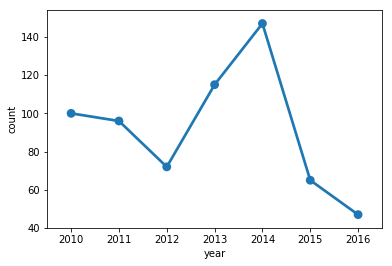

In [69]:
sns.pointplot(x='year', y='count', data = df_years)

Add your last name to the notebook, save it, and upload it to Blackboard.